A chi si rivolge: ragazzi delle superiori

Conoscenze pregresse: conoscenze di base di matematica (calcolo della probabilità) e conoscenze di base di programmazione (funzioni, for cycles)


# Lezione 2
## Il paradosso dei compleanni, metodo Montecarlo

Scommettereste che prese 20 persone in una classe ce ne sono almeno due che compiono gli anni lo stesso giorno? In base a cosa decidereste la risposta?

Qualunque sia la vostra risposta, state implicitamente facendo un assunto: dicendo *si*, state ritenendo che la probabilità sia maggiore o uguale al 50% mentre, rispondendo negativamente, state ritenendo che sia minore al 50%.
Ma si può effettivamente calcolare la probabilità? Se si, come?

Iniziamo ad astrarre il problema: per avere una classe di venti persone possiamo uscire per strada e intervistare 20 persone prese a caso, o tirare un dado a 365 facce per venti volte, o estrarre un numero da una sacca con 365 numeri.

Ma basta analizzare la situazione una volta sola per avere un dato valido statisticamente?
Ad esempio, se tiraste una moneta ed uscisse croce, al lancio successivo, su cosa scommettereste? La moneta potrebbe essere equilibrata o truccata e poi, truccata su testa o su croce?

Ammettiamo che scomettereste che su una classe di 20 persone non ce ne sono due che compiono gli anni nello stesso giorno, la vostra risposta cambierebbe se invece che una classe ne considerassimo venti? E con 100 classi?

Un solo tentativo è troppo poco per valutare un problema statistico: ci verrebbe da dire che la moneta sia equilibrata o truccata su croce, ma di sicuro non su testa. E se invece fosse stata truccata su testa e quello fosse stato l'unico lancio in cui sia uscita croce?

Per avere un dato valido statisticamente, dobbiamo effettuare almeno un centinaio di tentativi, ricordandoci che, comunque, più tentativi compiamo, maggiormente il risultato finale sarà preciso.

Come possiamo allora effettuare un centinaio di tentativi?
Vuol dire andare ad intervistare 100 gruppi da 20 persone, per un totale di 2000 persone intervistate. Sarebbe fattibile? Quanto ci vorrebbe?
Come abbiamo detto prima possiamo anche lanciare il dado o estrarre dei numeri da una sacca, ma sarebbe comunque un procedimento molto lungo.

Esiste un modo, uno strumento, che ci permette, in pochi secondi, di avere le risposte alle nostre domande: python.

Grazie a python, possiamo immaginare di avere un numero n di classi con un numero x di alunni, e questo ci permette di capire in che modo varia la probabilità.
Vedremo infatti come scrivere un codice che ci permetta di assegnare casualmente un compleanno ad ogni elemento di un insieme e che definirà, poi, una funzione che, dato un numero di elementi (il numero di studenti della classe) e il numero di tentativi (cioè il numero di classi da considerare), restituirà la probabilità che ci siano due elementi a cui è stato assegnato lo stesso giorno.


*Nota bene: Per poter avere una situazione che sia il più possibile fedele alla realtà, ma allo stesso tempo non trovarci a dover scrivere codici troppo complessi, consideriamo come data del compleanno il giorno dell'anno su 365 e non il giorno del mese (il primo gennaio sarà 1, il due gennaio 2 e così via).
Ma come possiamo calcolare il giorno dell'anno avendo il giorno e il mese? Finchè siamo a gennaio è ancora facile farlo a mente, ma se dovessimo calcolare, ad esempio, a che numero corrisponde il 14 febbraio? Per semplificare questo proceddimento di conversione, abbiamo scritto in python una funzione che esegue questi calcoli.*

Proviamo a visualizzare graficamente la situazione: creiamo due liste, *x* a cui corrisponderanno le persone e *y* a cui corrisponderanno i compleanni generati casualmente. Le coordinate ci forniranno dei punti, che saranno, simbolicamente, le nostre persone.

In [2]:
from random import random

In [3]:
x = range(30)

In [4]:
y = [round(random()*364) +1 for x in range(30)]

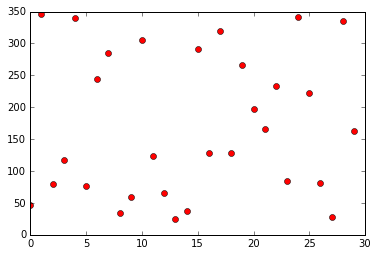

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
_ = plt.plot([x],[y], "ro")

Proviamo ora ad aumentarre gli alunni nella classe (quindi gli elementi di *x*)

In [6]:
x = range(500)

In [7]:
y = [round(random()*364) +1 for x in range(500)]

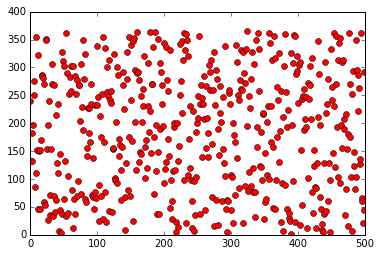

In [8]:
_ = plt.plot([x],[y], "ro")

In [9]:
def calcola_giorno(x):
    y = x.split(' ')
    if y[1] == "gennaio":
        return y[0]
    if y[1] == 'febbraio':
        return int(y[0]) +31
    if y[1] == 'marzo':
        return int(y[0]) +59
    if y[1] == "aprile":
        return int(y[0]) +90
    if y[1] == "maggio":
        return int(y[0]) +120
    if y[1] == "giugno":
        return int(y[0]) +151
    if y[1] == "luglio":
        return int(y[0]) +181
    if y[1] == "agosto":
        return int(y[0]) +212
    if y[1] == "settembre":
        return int(y[0]) +243
    if y[1] == "ottobre":
        return int(y[0]) +273
    if y[1] == "novembre":
        return int(y[0]) +304
    if y[1] == "dicembre":
        return int(y[0]) +334

Proviamo a fare qualche tentativo

In [10]:
calcola_giorno("20 luglio")

201

In [11]:
calcola_giorno("11 novembre")

315

Per completezza, abbiamo scritto anche la funzione che converte il numero nella data dell'anno

In [12]:
def calcola_data(x):
    if x <= 31:
        return '%s gennaio' % x
    if 31 < x <= 59:
        return str(x - 31) + ' febbraio'
    if 59 < x <= 90:
        return str(x - 59) + ' marzo'
    if 90 < x <= 120:
        return str(x - 90) + ' aprile'
    if 120 < x <= 151:
        return str(x - 120) + ' maggio'
    if 151 < x <= 181:
        return str(x - 151) + ' giugno'
    if 181 < x <= 212:
        return str(x - 181) + ' luglio'
    if 212 < x <= 243:
        return str(x - 212) + ' agosto'
    if 243 < x <= 273:
        return str(x - 243) + ' settembre'
    if 273 < x <= 304:
        return str(x - 273) + ' ottobre'
    if 304 < x <= 334:
        return str(x - 304) + ' novembre'
    if 334 < x <= 365:
        return str(x - 334) + ' dicembre'

In [13]:
calcola_data(201)

'20 luglio'

In [14]:
calcola_data(315)

'11 novembre'

A questo punto, possiamo iniziare a risolvere il problema vero e proprio. Iniziamo col simulare la classe:

In [15]:
from random import random

Definiamo ora una funzione che ci permetterà, dopo aver assegnato ad ogni elemento della classe un numero casuale, compreso fra 0 (escluso) e 365 (incluso), che rappresenterà il giorno del compleanno, di calcolare il numero di collisioni (che chiamaremo "totale") che avvengono: cosa vuol dire? Python andrà a controllare se nella lista in cui ad ogni elemento della nostra classe ha assegnato un numero ci sono delle collisioni, ovvero dei numeri che ricorrono più di una volta ("if compleanni.count(X) >= 2") e andrà a sommare il numero di collisioni.

In [16]:
def collision(i):
    compleanni = [round(random()*364) +1 for x in i]
    if len(set(compleanni)) != len(compleanni):
        return True
    else:
        return False

A questo punto, possiamo eseguire "collision" sulla nostra classe

In [17]:
classe = range(30)

In [18]:
collision(classe)

True

Sappiamo che la probabilità si calcola facendo il rapporto fra il numero di casi favorevoli e il numero di casi totali, quindi definiamo la funzione che calcolerà questo rapporto

In [19]:
def prob(numero_persone, numero_prove = 1000):
    classe = range(numero_persone)
    tentativi = [collision(classe) for x in range(numero_prove)]
    return sum(tentativi)/len(tentativi)*100

Chiamiamo ora la funzione per avere la probabilità

In [20]:
prob(23,20)

75.0

In [21]:
prob(23)

52.0

Vogliamo ora vedere come vari la probabilità al variare del numero di persone nell'intervallo da zero a cento

In [22]:
ls = range(100)

In [23]:
prob_tot = [prob(x) for x in ls]

In questo modo abbiamo ottenuto la lista delle probabilità calcolata in base al numero di elementi (da 0 a 100)

In [24]:
prob_tot

[0.0,
 0.0,
 0.4,
 1.3,
 2.3,
 2.8000000000000003,
 4.2,
 4.5,
 7.6,
 9.2,
 10.6,
 13.0,
 17.5,
 20.7,
 22.3,
 25.6,
 30.5,
 30.7,
 36.9,
 38.3,
 42.4,
 45.1,
 45.800000000000004,
 51.0,
 53.6,
 56.2,
 58.599999999999994,
 62.2,
 65.2,
 69.1,
 69.69999999999999,
 73.2,
 75.4,
 76.4,
 80.0,
 80.60000000000001,
 82.69999999999999,
 84.2,
 87.4,
 88.2,
 88.4,
 89.1,
 91.60000000000001,
 93.10000000000001,
 93.30000000000001,
 94.3,
 94.1,
 95.8,
 95.8,
 96.6,
 96.3,
 97.2,
 97.2,
 97.8,
 98.4,
 98.7,
 98.3,
 99.1,
 99.5,
 99.3,
 99.4,
 99.8,
 99.6,
 99.9,
 99.8,
 99.9,
 99.7,
 99.7,
 100.0,
 99.7,
 100.0,
 100.0,
 100.0,
 100.0,
 99.9,
 100.0,
 99.9,
 100.0,
 100.0,
 100.0,
 99.9,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0]

Disegnamo ora il grafico che rappresenti l'andamento della probabilità al crescere degli elementi nell'insieme (il numero di studenti nella classe)

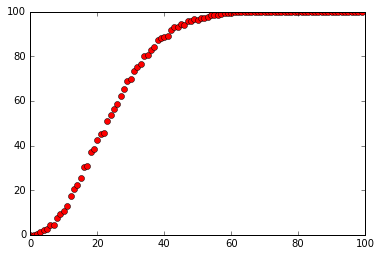

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
_ = plt.plot([ls],[prob_tot], "ro")

In [26]:
from random import random

Scriviamo ora una funzione che ci permetta di ottenere il giorno di collisione in una classe

In [27]:
def collision_day(i):
    compleanni = [round(random()*364) +1 for x in i]
    ls_1 = compleanni
    ls = [x for x in ls_1 if ls_1.count(x) >= 2]
    return ls

In [28]:
classe = range(20)

In [29]:
collision_day(classe)

[311, 311]

In [30]:
tentativi = [collision(classe) for x in range(1000)]

In [31]:
days = collision_day(tentativi)

In questo modo, abbiamo ottenuto una lista *days* che contiene i giorni di collisione in classe con un migliaio di tentativi

In [32]:
days.sort()

In [33]:
days

[2,
 2,
 3,
 3,
 4,
 4,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 8,
 8,
 9,
 9,
 10,
 10,
 11,
 11,
 11,
 12,
 12,
 13,
 13,
 13,
 13,
 15,
 15,
 17,
 17,
 18,
 18,
 18,
 19,
 19,
 19,
 19,
 20,
 20,
 20,
 20,
 20,
 22,
 22,
 22,
 22,
 23,
 23,
 24,
 24,
 25,
 25,
 25,
 26,
 26,
 27,
 27,
 27,
 27,
 29,
 29,
 29,
 29,
 29,
 31,
 31,
 31,
 32,
 32,
 32,
 33,
 33,
 33,
 37,
 37,
 38,
 38,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 40,
 40,
 40,
 40,
 40,
 41,
 41,
 41,
 42,
 42,
 42,
 42,
 42,
 43,
 43,
 44,
 44,
 45,
 45,
 47,
 47,
 47,
 48,
 48,
 48,
 49,
 49,
 49,
 49,
 50,
 50,
 51,
 51,
 51,
 51,
 51,
 52,
 52,
 52,
 52,
 53,
 53,
 53,
 54,
 54,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 58,
 58,
 58,
 58,
 60,
 60,
 60,
 62,
 62,
 63,
 63,
 63,
 63,
 65,
 65,
 66,
 66,
 66,
 67,
 67,
 67,
 68,
 68,
 68,
 69,
 69,
 69,
 70,
 70,
 70,
 71,
 71,
 71,
 71,
 71,
 72,
 72,
 72,
 72,
 72,
 72,
 73,
 73,
 73,
 73,
 74,
 74,
 75,
 75,
 76,
 76,
 77,
 77,
 79,
 79,
 79,
 79,
 82,
 82,
 83,
 83

In [55]:
days_counted = [days.count(x) for x in set(days)]

Se vogliamo contare quante volte un giorno si ripete, dobbiamo chiedere a python di contare ogni elemento della lista days

In [56]:
days_counted

[2,
 2,
 2,
 3,
 8,
 2,
 2,
 2,
 2,
 3,
 2,
 4,
 2,
 2,
 3,
 4,
 5,
 4,
 2,
 2,
 3,
 2,
 4,
 5,
 3,
 3,
 3,
 2,
 2,
 7,
 5,
 3,
 5,
 2,
 2,
 2,
 3,
 3,
 4,
 2,
 5,
 4,
 3,
 2,
 7,
 4,
 3,
 2,
 4,
 2,
 3,
 3,
 3,
 3,
 3,
 5,
 6,
 4,
 2,
 2,
 2,
 2,
 4,
 2,
 4,
 2,
 4,
 2,
 5,
 2,
 2,
 3,
 3,
 6,
 5,
 2,
 4,
 4,
 2,
 3,
 2,
 3,
 4,
 4,
 5,
 2,
 4,
 4,
 3,
 5,
 4,
 4,
 2,
 5,
 3,
 2,
 3,
 3,
 3,
 3,
 2,
 3,
 2,
 4,
 2,
 2,
 5,
 2,
 4,
 3,
 5,
 4,
 4,
 5,
 3,
 3,
 7,
 5,
 3,
 3,
 2,
 5,
 2,
 3,
 4,
 3,
 3,
 2,
 2,
 3,
 2,
 4,
 3,
 4,
 3,
 3,
 3,
 6,
 2,
 2,
 2,
 2,
 3,
 5,
 5,
 3,
 4,
 4,
 4,
 2,
 2,
 6,
 3,
 2,
 5,
 2,
 3,
 2,
 4,
 2,
 5,
 2,
 4,
 3,
 3,
 2,
 4,
 5,
 3,
 4,
 3,
 4,
 3,
 4,
 6,
 4,
 4,
 5,
 3,
 3,
 3,
 4,
 3,
 5,
 4,
 4,
 3,
 2,
 2,
 2,
 3,
 3,
 3,
 4,
 4,
 6,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 2,
 2,
 3,
 2,
 3,
 2,
 4,
 2,
 2,
 9,
 5,
 2,
 2,
 3,
 3,
 3,
 5,
 3,
 4,
 4,
 4,
 2,
 3,
 2,
 6,
 5,
 4,
 5,
 3,
 6,
 4,
 2,
 4,
 5,
 2,
 3,
 4,
 2,
 3,
 5,
 2,
 2,
 5,
 5,
 3,
 2,
 4,


In [57]:
days_y = [0]*366

In [58]:
for x in days:
    days_y[x] += 1

Creando un contatore, otteniamo una lista di 365 elementi in cui troviamo l'inidicazione di quante volte quel numero si ripete nella lista *days*

In [59]:
days_y

[0,
 0,
 2,
 2,
 2,
 3,
 8,
 2,
 2,
 2,
 2,
 3,
 2,
 4,
 0,
 2,
 0,
 2,
 3,
 4,
 5,
 0,
 4,
 2,
 2,
 3,
 2,
 4,
 0,
 5,
 0,
 3,
 3,
 3,
 0,
 0,
 0,
 2,
 2,
 7,
 5,
 3,
 5,
 2,
 2,
 2,
 0,
 3,
 3,
 4,
 2,
 5,
 4,
 3,
 2,
 0,
 7,
 0,
 4,
 0,
 3,
 0,
 2,
 4,
 0,
 2,
 3,
 3,
 3,
 3,
 3,
 5,
 6,
 4,
 2,
 2,
 2,
 2,
 0,
 4,
 0,
 0,
 2,
 4,
 2,
 4,
 0,
 2,
 5,
 2,
 2,
 3,
 3,
 0,
 6,
 0,
 5,
 2,
 4,
 4,
 2,
 3,
 2,
 0,
 3,
 4,
 4,
 5,
 0,
 2,
 4,
 4,
 0,
 3,
 5,
 4,
 4,
 2,
 0,
 5,
 3,
 0,
 2,
 3,
 3,
 3,
 0,
 3,
 2,
 3,
 2,
 4,
 2,
 0,
 2,
 5,
 2,
 4,
 3,
 5,
 4,
 0,
 4,
 5,
 3,
 3,
 0,
 7,
 5,
 3,
 3,
 2,
 0,
 5,
 2,
 3,
 4,
 3,
 3,
 2,
 2,
 0,
 3,
 2,
 4,
 0,
 3,
 0,
 4,
 3,
 0,
 0,
 3,
 0,
 3,
 6,
 2,
 0,
 2,
 2,
 2,
 0,
 3,
 5,
 5,
 0,
 3,
 4,
 4,
 4,
 2,
 2,
 6,
 3,
 0,
 2,
 5,
 0,
 0,
 2,
 3,
 2,
 0,
 4,
 0,
 2,
 5,
 2,
 0,
 4,
 3,
 3,
 2,
 4,
 0,
 5,
 3,
 4,
 3,
 4,
 3,
 4,
 0,
 6,
 4,
 4,
 5,
 3,
 3,
 3,
 4,
 0,
 3,
 5,
 0,
 4,
 4,
 3,
 2,
 2,
 2,
 3,
 3,
 0,
 3,
 4,
 4,
 6,
 2,
 0,


In [60]:
b = list(range(365))

Avendo questi dati, possiamo ottenere il grafico che ci mostra quante volte una certa data si ripeta

In [61]:
import plotly.plotly as py
py.sign_in('crissy', 'mqocxgkij9')

import plotly.graph_objs as go

data = [go.Bar(
            x=b,
            y=days_y
    )]

py.iplot(data, filename='basic-bar')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~crissy/0 or inside your plot.ly account where it is named 'basic-bar'


Per concludere, chiediamo a python una lista che accoppi il giorno dell'anno alle volte che si ripete (accoppiamo cioè i dati del grafico)

In [64]:
days_complete = [(x, days_y[x]) for x in range(365)]

In [65]:
days_complete

[(0, 0),
 (1, 0),
 (2, 2),
 (3, 2),
 (4, 2),
 (5, 3),
 (6, 8),
 (7, 2),
 (8, 2),
 (9, 2),
 (10, 2),
 (11, 3),
 (12, 2),
 (13, 4),
 (14, 0),
 (15, 2),
 (16, 0),
 (17, 2),
 (18, 3),
 (19, 4),
 (20, 5),
 (21, 0),
 (22, 4),
 (23, 2),
 (24, 2),
 (25, 3),
 (26, 2),
 (27, 4),
 (28, 0),
 (29, 5),
 (30, 0),
 (31, 3),
 (32, 3),
 (33, 3),
 (34, 0),
 (35, 0),
 (36, 0),
 (37, 2),
 (38, 2),
 (39, 7),
 (40, 5),
 (41, 3),
 (42, 5),
 (43, 2),
 (44, 2),
 (45, 2),
 (46, 0),
 (47, 3),
 (48, 3),
 (49, 4),
 (50, 2),
 (51, 5),
 (52, 4),
 (53, 3),
 (54, 2),
 (55, 0),
 (56, 7),
 (57, 0),
 (58, 4),
 (59, 0),
 (60, 3),
 (61, 0),
 (62, 2),
 (63, 4),
 (64, 0),
 (65, 2),
 (66, 3),
 (67, 3),
 (68, 3),
 (69, 3),
 (70, 3),
 (71, 5),
 (72, 6),
 (73, 4),
 (74, 2),
 (75, 2),
 (76, 2),
 (77, 2),
 (78, 0),
 (79, 4),
 (80, 0),
 (81, 0),
 (82, 2),
 (83, 4),
 (84, 2),
 (85, 4),
 (86, 0),
 (87, 2),
 (88, 5),
 (89, 2),
 (90, 2),
 (91, 3),
 (92, 3),
 (93, 0),
 (94, 6),
 (95, 0),
 (96, 5),
 (97, 2),
 (98, 4),
 (99, 4),
 (100, 2),